# Proyek Analisis Data: PRSA_Data_Tiantan_20130301-20170228
- **Nama:** Eros Alfedo Hermanto
- **Email:** erosalfedo1@gmail.com
- **ID Dicoding:** Eros Alfedo Hermanto

## Menentukan Pertanyaan Bisnis

- Bagaimana pola variasi harian tingkat PM2.5 di Stasiun Tiantan ?

- Apakah kualitas udara di Tiantan lebih baik atau lebih buruk pada hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import mstats

## Data Wrangling

### Gathering Data

In [2]:
data = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")

In [3]:
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


### Assessing Data

In [4]:
# Menampilkan jumlah nilai unik untuk setiap kolom
unique_counts = data.nunique()

unique_counts

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         640
SO2          259
NO2          319
CO           117
O3           678
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64

In [5]:
# memeriksa tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
data.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

In [9]:
# menghapus kolom "No"
data = data.drop(columns=['No'])  

In [10]:
# Imputasi nilai yang hilang untuk kolom numerik
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Imputasi nilai yang hilang untuk kolom kategorikal
categorical_cols = ['wd']
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

In [11]:
# Menampilkan jumlah nilai yang hilang setelah diimputasi
missing_values_after_imputation = data.isna().sum()

# Menampilkan hasil
print("Jumlah nilai yang hilang setelah diimputasi:")
print(missing_values_after_imputation)


Jumlah nilai yang hilang setelah diimputasi:
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore PM2.5 di stasiun Tiantan

In [12]:
data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.67149,1012.547419,2.447535,0.064020,1.860785
std,1.177213,3.448752,8.800218,6.922285,80.136357,88.933239,19.820869,31.605474,1151.643926,58.366975,11.45515,10.263131,13.806757,0.786058,1.280113
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.80000,987.100000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,23.000000,41.000000,3.000000,29.000000,600.000000,8.000000,3.10000,1004.000000,-8.800000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,7.000000,48.000000,1000.000000,42.000000,14.60000,1012.200000,3.000000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,112.000000,143.000000,16.000000,70.000000,1600.000000,79.000000,23.50000,1020.900000,15.000000,0.000000,2.400000
max,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.10000,1042.000000,28.800000,46.400000,10.500000


In [13]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,6.0,4.0,8.000000,300.0,81.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.000000,300.0,80.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.000000,300.0,75.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.000000,300.0,74.000000,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.000000,400.0,70.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,20.0,48.0,2.0,53.162646,500.0,55.984297,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,2017,2,28,20,11.0,34.0,3.0,36.000000,500.0,55.984297,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,2017,2,28,21,18.0,32.0,4.0,48.000000,500.0,48.000000,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,2017,2,28,22,15.0,42.0,5.0,52.000000,600.0,44.000000,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


In [14]:
# subset data yang diperlukan
pm25_hourly = data[['hour', 'PM2.5']]
pm25_hourly

,hour,PM2.5
0,0,6.0
1,1,6.0
2,2,6.0
3,3,6.0
4,4,5.0
...,...,...
35059,19,20.0
35060,20,11.0
35061,21,18.0
35062,22,15.0


In [15]:
# mean
pm25_daily_avg = pm25_hourly.groupby('hour')['PM2.5'].mean()
pm25_daily_avg

hour
0     88.909637
1     88.548623
2     88.091066
3     86.821354
4     84.417388
5     81.732271
6     79.209318
7     77.785262
8     79.176217
9     79.862966
10    80.426956
11    81.418360
12    80.091427
13    79.143807
14    79.059025
15    76.658981
16    76.004409
17    76.961401
18    78.295087
19    81.122956
20    84.437103
21    86.829780
22    87.969862
23    88.984612
Name: PM2.5, dtype: float64

In [16]:
# Filter data Tiantan
df_tiantan = data[data['station']=='Tiantan']

In [17]:
# Tambahkan kolom datetime
df_tiantan['datetime'] = pd.to_datetime(df_tiantan[['year', 'month', 'day', 'hour']])

# Buat kolom day_type
df_tiantan['day_type'] = 'Weekday'
df_tiantan.loc[df_tiantan['datetime'].dt.weekday >= 5, 'day_type'] = 'Weekend'

In [18]:
# Hitung rata-rata PM2.5
df_pm25 = df_tiantan.groupby('day_type')['PM2.5'].mean().reset_index()
df_pm25

,day_type,PM2.5
0,Weekday,80.257866
1,Weekend,86.923399


## Visualization & Explanatory Analysis

### Pertanyaan 1:

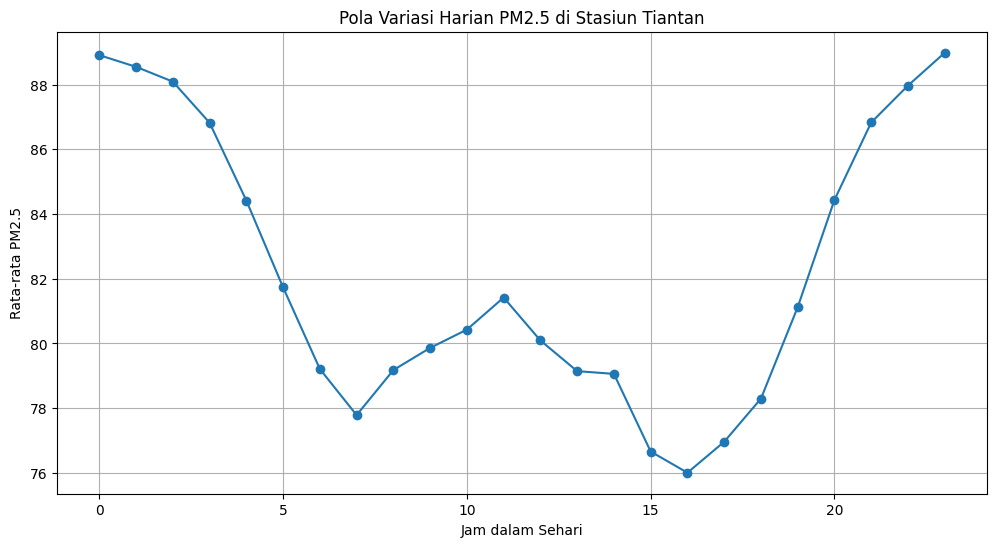

In [19]:
plt.figure(figsize=(12, 6))
pm25_daily_avg.plot(kind='line', marker='o')
plt.title('Pola Variasi Harian PM2.5 di Stasiun Tiantan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()


### Pertanyaan 2:

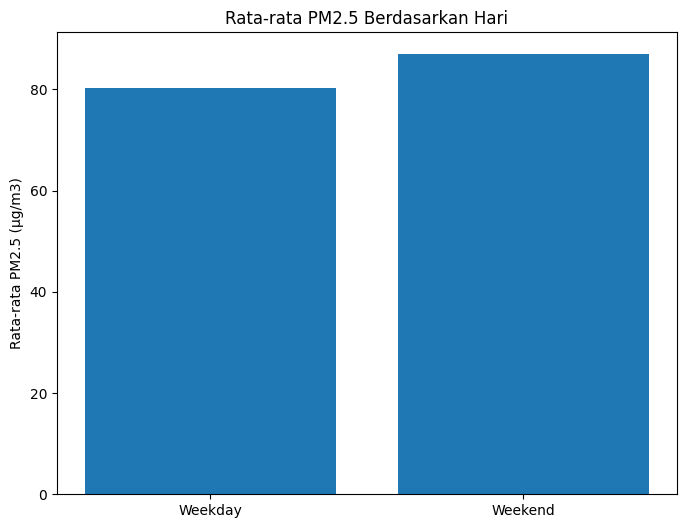

In [20]:
# Buat plot 
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df_pm25['day_type'], df_pm25['PM2.5'])

# Decorasi plot
ax.set_title('Rata-rata PM2.5 Berdasarkan Hari')
ax.set_ylabel('Rata-rata PM2.5 (μg/m3)')
ax.set_ylim(0)

plt.show()

## Conclusion

- Conclution pertanyaan 1

Gambar untuk pertanyaan pertama menunjukkan bahwa tingkat PM2.5 di Stasiun Tiantan rata-rata tinggi, terutama pada menjelang malam hari, PM2.5 Meningkat. 
Tingkat PM2.5 pada pagi hari cenderung turun.

Penjelasan:

Tingkat PM2.5 di Tiantan dipengaruhi oleh berbagai faktor, termasuk aktivitas manusia, aktivitas meteorologi, dan karakteristik geografis.

Aktivitas manusia, seperti transportasi, industri, dan pembakaran bahan bakar, merupakan sumber utama polusi udara. Aktivitas-aktivitas tersebut umumnya lebih tinggi pada waktu  malam hari, sehingga menyebabkan tingkat PM2.5 juga lebih tinggi pada waktu-waktu tersebut.

- Conclution pertanyaan 2

menunjukkan bahwa rata-rata tingkat PM2.5 pada hari kerja dan akhir pekan tidak terlalu berbeda.

penjelasan 

Rata-rata tingkat PM2.5 pada hari kerja adalah 80.26 μg/m³, sedangkan rata-rata tingkat PM2.5 pada akhir pekan adalah 86.92 μg/m³. Perbedaan rata-rata tersebut tidak terlalu signifikan, yaitu sebesar 6.67 μg/m³.

Kualitas udara di Tiantan tidak terlalu berbeda antara hari kerja dan akhir pekan. Hal ini dapat disebabkan oleh beberapa faktor, seperti:

Kualitas udara di Tiantan pada umumnya sudah buruk, sehingga perbedaan antara hari kerja dan akhir pekan tidak terlalu signifikan.
Perbedaan aktivitas manusia dan aktivitas meteorologi antara hari kerja dan akhir pekan tidak terlalu signifikan.
